# Doubly Linked Lists

Very similar to singly linked lists, but each node now has two pointers (next and prev). In addition to the next pointer, we have a prev pointer which points to the previous node. If the prev pointer points to null, it is an indication that we are at the head of the linked list

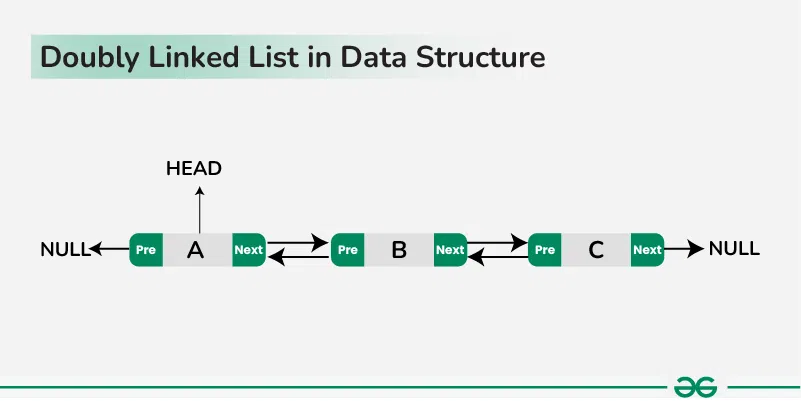

## Operations

### Insert End

Similar to the singly linked list, adding a node to a doubly linked list will run in O(1) time. Only this time, we have to update the prev pointer as well.

For example, if we have three nodes in our linked list, ListNode1, ListNode2 and ListNode3. Now we have another node, ListNode4, that we wish to insert at the end. We will have to update both the next pointer of ListNode3 and the prev pointer of ListNode4.

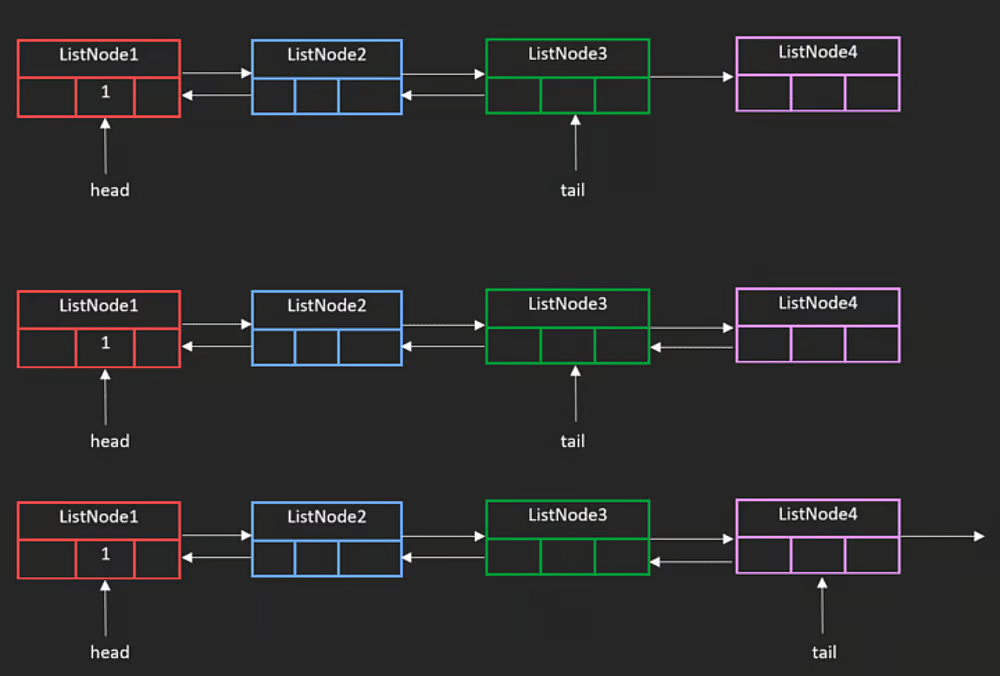

```python
tail.next = ListNode4
ListNode4.prev = tail
tail = tail.next
```

### Delete End
Deleting at the end is also O(1)

```python
#First we get a reference to the node before the tail.
ListNode2 = tail.prev
#We update the next pointer of the node before the tail to null.
ListNode2.next = null
#We update the tail to be the node before the tail.
tail = ListNode2
```

> Since we can insert and remove from the end in O(1) time, in theory, we could implement a stack with a linked list instead of an array. This is less common, but it is a possibility.


## Access

Similar to singly linked lists, we cannot randomly access a node. So in the worst case, we will have to traverse n nodes before reaching the desired node. This would run in O(n) time.

Doubly linked lists have the benefit that we can traverse the list in both directions, as opposed to singly linked lists.


---
## Time complexity

| Operation | Arrays | LinkedLists |
|:-|:-|:-|
| Access i-th | O(1) | O(n) if dont have relevant pointer |
| Insert/Remove end | O(1) | O(1) |
| Insert/Remove mid | O(n) | O(1) to O(n), no need shift everything, just reassign the relevant pointer. |

Insert/Remove is $O(1)$ if you have reference to that node

In [ ]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None

# Implementation for Doubly Linked List
class LinkedList:
    def __init__(self):
        # Init the list with 'dummy' head and tail nodes which makes 
        # edge cases for insert & remove easier.
        # but this is very confusing lol
        self.head = ListNode(-1)
        self.tail = ListNode(-1)
        self.head.next = self.tail
        self.tail.prev = self.head
    
    def insertFront(self, val):
        newNode = ListNode(val)
        newNode.prev = self.head
        newNode.next = self.head.next

        self.head.next.prev = newNode
        #only update at the end
        self.head.next = newNode

    def insertEnd(self, val):
        newNode = ListNode(val)
        newNode.next = self.tail
        newNode.prev = self.tail.prev

        self.tail.prev.next = newNode
        self.tail.prev = newNode

    # Remove first node after dummy head (assume it exists)
    def removeFront(self):
        self.head.next.next.prev = self.head
        self.head.next = self.head.next.next

    # Remove last node before dummy tail (assume it exists)
    def removeEnd(self):
        self.tail.prev.prev.next = self.tail
        self.tail.prev = self.tail.prev.prev

    def print(self):
        curr = self.head.next
        while curr != self.tail:
            print(curr.val, " -> ")
            curr = curr.next
        print()


## Problem: design a linked (doubly) list

https://leetcode.com/problems/design-linked-list/

In [29]:
class MyLinkedList(object):

    def __init__(self):
        #dummy nodes for BOTH HEAD AND TAIL

        #DIFFERENT FROM SINGLY LINKED LISTS
        #this means self.head is always reserved for the dummy head and self.tail is always reserved for the dummy tail

        self.head=ListNode()
        self.tail=ListNode()
        self.head.next=self.tail
        self.tail.prev=self.head

    def get(self, index):
        """
        :type index: int
        :rtype: int
        """
        i=0
        #head is a dummy node
        curr=self.head.next
        while i<index:
            curr=curr.next
            i+=1
        return curr.val if curr else -1
        

    def addAtHead(self, val):
        """
        :type val: int
        :rtype: None
        """
        new=ListNode(val)
        #new.prev is the dummy head
        new.prev=self.head
        #new.next is the old real head
        new.next=self.head.next
        #old real head.prev is new
        self.head.next.prev=new
        #self.head.next is new
        self.head.next=new

    def addAtTail(self, val):
        """
        :type val: int
        :rtype: None
        """
        new=ListNode(val)
        #new.prev is the old real tail
        new.prev=self.tail.prev
        #new.next is the dummy tail
        new.next=self.tail
        #old real tail.next is new
        self.tail.prev.next=new
        #self.tail.prev is new
        self.tail.prev=new


    def addAtIndex(self, index, val):
        """
        :type index: int
        :type val: int
        :rtype: None
        """
        i = 0
        curr = self.head.next
        #allow curr to take self.tail too
        while i < index and curr:
            i += 1
            curr = curr.next
        if curr:
            new=ListNode(val)
            new.next=curr
            new.prev=curr.prev
            curr.prev.next=new
            curr.prev=new
        

    def deleteAtIndex(self, index):
        """
        :type index: int
        :rtype: None
        """
        i = 0
        curr = self.head.next
        while i < index and curr.next:
            i += 1
            curr = curr.next
        if curr.prev and curr.next:
            #the existence of dummy heads and tails allow us to do this simply
            curr.prev.next=curr.next
            curr.next.prev=curr.prev

    def view(self):
        l=[]
        curr=self.head.next
        while curr.next:
            l.append(curr.val)
            curr=curr.next
        return "The linked list is "+str(l)

class ListNode:
    def __init__(self, val=-1, next=None, prev=None):
        self.val = val #this is an integer rep
        self.next = next #this is literally the next object
        self.prev = prev

In [35]:
#neet solution
#very clean and structured, really like it :)

class ListNode:
    def __init__(self, val):
        self.val = val
        self.prev = None
        self.next = None


class MyLinkedList(object):
    def __init__(self):
        """
        Initialize your data structure here.
        These dummy nodes means everything is going on in the MIDDLE in between 2 nodes
        """
        self.left=ListNode(-1)
        self.right=ListNode(-1)
        self.left.next=self.right
        self.right.prev=self.left

    def get(self, index: int) -> int:
        """
        Get the value of the index-th node in the linked list. If the index is invalid, return -1.
        """
        cur=self.left.next
        while cur and index>0:
            cur = cur.next
            index-=1
        #first condition keeps it to index 0 till right node
        # second condition keeps it index 0 to last real node
        # index==0 terminates it
        if cur and cur !=self.right and index==0:
            return cur.val
        return -1



    def addAtHead(self, val: int) -> None:
        """
        Add a node of value val before the first element of the linked list. After the insertion, the new node will be
        the first node of the linked list.
        """
        #this is really useful!
        node, next, prev = ListNode(val), self.left.next, self.left
        prev.next=node
        next.prev=node
        node.next=next
        node.prev=prev

    def addAtTail(self, val: int) -> None:
        """
        Append a node of value val to the last element of the linked list.
        """
        node, next, prev = ListNode(val), self.right, self.right.prev
        prev.next=node
        next.prev=node
        node.next=next
        node.prev=prev

    def addAtIndex(self, index: int, val: int) -> None:
        """
        Add a node of value val before the index-th node in the linked list. If index equals to the length of linked
        list, the node will be appended to the end of linked list. If index is greater than the length, the node will not
        be inserted.
        """
        #start from first real node
        cur=self.left.next
        while cur and index>0:
            cur=cur.next
            index-=1
        #first cond restricts from 0th to self.right, index==0 terminates it
        if cur and index==0:
            node, next, prev = ListNode(val), cur, cur.prev
            prev.next=node
            next.prev=node
            node.next=next
            node.prev=prev
        

    def deleteAtIndex(self, index: int) -> None:
        """
        Delete the index-th node in the linked list, if the index is valid.
        """
        #start from first real node
        cur=self.left.next
        #while cur restricts from 0th to self.right
        while cur and index>0:
            cur=cur.next
            index-=1
        #first cond restricts from 0th to self.right, then cannot be self.right, index==0 terminates it
        if cur and cur!=self.right and index==0:
            next, prev = cur.next, cur.prev
            prev.next=next
            next.prev=prev

    def view(self):
        l=[]
        curr=self.left.next
        while curr.next:
            l.append(curr.val)
            curr=curr.next
        return "The linked list is "+str(l)

In [36]:
myLinkedList = MyLinkedList()
myLinkedList.addAtHead(1)
print(myLinkedList.view())
myLinkedList.addAtTail(3)
print(myLinkedList.view())
myLinkedList.addAtIndex(1, 2)
print(myLinkedList.view())
myLinkedList.get(1)
myLinkedList.deleteAtIndex(1)
print(myLinkedList.view())
myLinkedList.get(1)

The linked list is [1]
The linked list is [1, 3]
The linked list is [1, 2, 3]
The linked list is [1, 3]


3

In [37]:
linked_list = MyLinkedList()
print(linked_list.view())
linked_list.addAtHead(2)
print(linked_list.view())
linked_list.deleteAtIndex(1)
print(linked_list.view())
linked_list.addAtHead(2)
print(linked_list.view())
linked_list.addAtHead(7)
print(linked_list.view())
linked_list.addAtHead(3)
print(linked_list.view())
linked_list.addAtHead(2)
print(linked_list.view())
linked_list.addAtHead(5)
print(linked_list.view())
linked_list.addAtTail(5)
print(linked_list.view())
result = linked_list.get(5)
print(f"Get result: {result}")
print(linked_list.view())
linked_list.deleteAtIndex(6)
print(linked_list.view())
linked_list.deleteAtIndex(4)
print(linked_list.view())

The linked list is []
The linked list is [2]
The linked list is [2]
The linked list is [2, 2]
The linked list is [7, 2, 2]
The linked list is [3, 7, 2, 2]
The linked list is [2, 3, 7, 2, 2]
The linked list is [5, 2, 3, 7, 2, 2]
The linked list is [5, 2, 3, 7, 2, 2, 5]
Get result: 2
The linked list is [5, 2, 3, 7, 2, 2, 5]
The linked list is [5, 2, 3, 7, 2, 2]
The linked list is [5, 2, 3, 7, 2]


In [38]:
linked_list = MyLinkedList()
print(linked_list.view())
linked_list.addAtHead(1)
print(linked_list.view())
linked_list.addAtTail(3)
print(linked_list.view())
linked_list.addAtIndex(10, 2)
print(linked_list.view())

The linked list is []
The linked list is [1]
The linked list is [1, 3]
The linked list is [1, 3]


## Problem: Design Browser History

https://leetcode.com/problems/design-browser-history/

**tips**

- very common: always test out edge cases of weird indexes
- always do dummy left and dummy right for doubly linked lists

In [46]:


class BrowserHistory:

    def __init__(self, homepage: str):
        self.left=action(url=None)
        self.right=action(url=None)
        
        #update code for insertion, neetcode very helpful!
        node, prev, next = action(url=homepage), self.left, self.right
        prev.next=node
        next.prev=node
        node.next=next
        node.prev=prev

        #current browser page
        self.on=self.left.next

    def visit(self, url: str) -> None:
        #insert into link list
        node, prev, next = action(url), self.on, self.right #next being self.right clears up the browser history
        prev.next=node
        next.prev=node
        node.next=next
        node.prev=prev

        #update current page
        self.on=node

    def back(self, steps: int) -> str:
        i=0
        #second condition makes it such that it can only go back to the first real site
        while i<steps and self.on.prev.prev:
            i+=1
            self.on=self.on.prev
        return self.on.val

    def forward(self, steps: int) -> str:
        i=0
        #must have 2 steps forward at least, since at the start of this loop am on the 2nd last proper node, then during this loop will be at the last proper node
        while i<steps and self.on.next.next:
            i+=1
            self.on=self.on.next
        return self.on.val
    
    def view(self):
        l=[]
        curr=self.left.next
        while curr.next:
            l.append(curr.val)
            curr=curr.next
        return "The linked list is "+str(l)
    

class action:
    '''
    action defines going to the url, keep a prev history and tracking the next step
    '''
    def __init__(self, url, next=None, prev=None):
        self.val=url
        self.next=next
        self.prev=prev

# Your BrowserHistory object will be instantiated and called as such:
# obj = BrowserHistory(homepage)
# obj.visit(url)
# param_2 = obj.back(steps)
# param_3 = obj.forward(steps)

In [47]:
browserHistory = BrowserHistory("leetcode.com")
print(browserHistory.view())
browserHistory.visit("google.com")
print(browserHistory.view())
browserHistory.visit("facebook.com")
print(browserHistory.view())
browserHistory.visit("youtube.com")
print(browserHistory.view())
result = browserHistory.back(1)
print(f"Back 1: {result}")
print(browserHistory.view())
result = browserHistory.back(1)
print(f"Back 1: {result}")
print(browserHistory.view())
result = browserHistory.forward(1)
print(f"Forward 1: {result}")
print(browserHistory.view())
browserHistory.visit("linkedin.com")
print(browserHistory.view())
result = browserHistory.forward(2)
print(f"Forward 2: {result}")
print(browserHistory.view())
result = browserHistory.back(2)
print(f"Back 2: {result}")
print(browserHistory.view())
result = browserHistory.back(7)
print(f"Back 7: {result}")
print(browserHistory.view())

The linked list is ['leetcode.com']
The linked list is ['leetcode.com', 'google.com']
The linked list is ['leetcode.com', 'google.com', 'facebook.com']
The linked list is ['leetcode.com', 'google.com', 'facebook.com', 'youtube.com']
Back 1: facebook.com
The linked list is ['leetcode.com', 'google.com', 'facebook.com', 'youtube.com']
Back 1: google.com
The linked list is ['leetcode.com', 'google.com', 'facebook.com', 'youtube.com']
Forward 1: facebook.com
The linked list is ['leetcode.com', 'google.com', 'facebook.com', 'youtube.com']
The linked list is ['leetcode.com', 'google.com', 'facebook.com', 'linkedin.com']
Forward 2: linkedin.com
The linked list is ['leetcode.com', 'google.com', 'facebook.com', 'linkedin.com']
Back 2: google.com
The linked list is ['leetcode.com', 'google.com', 'facebook.com', 'linkedin.com']
Back 7: leetcode.com
The linked list is ['leetcode.com', 'google.com', 'facebook.com', 'linkedin.com']
